<a href="https://colab.research.google.com/github/KBerry-050/data-science-portfolio/blob/main/Module_3_Assignment_Berry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for EDA and visualization
import pandas as pd
import numpy as np
from numpy import mean, absolute, sqrt, arange
import matplotlib.pyplot as plt
import seaborn as sns

INGEST


In [ ]:
# read in train dataset, create DF, look at first 5 records
df_train = pd.read_csv("train.csv")
df_train = pd.DataFrame(data=df_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


EDA

In [ ]:
# investigate the dependent variable - see basic descriptive stats
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

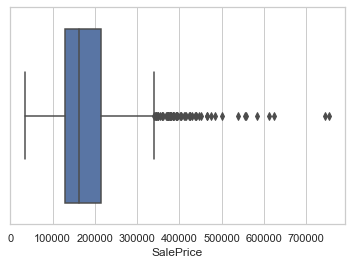

In [ ]:
# create boxplot to visualize the distribution of data
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_train["SalePrice"])

In [ ]:
# check to see how many records fall outside of one standard deviation from the mean
high = (df_train['SalePrice'] >= 257000).sum()
low = (df_train['SalePrice'] <= 103000).sum()

print("The number of house prices outside of 1 std. deviation is: ", high + low)
print("The percentage of total records that fall outside 1 std. dev. is: ",(high+low)/1460)

The number of house prices outside of 1 std. deviation is:  332
The percentage of total records that fall outside 1 std. dev. is:  0.2273972602739726


In [ ]:
# check for missing data by column
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# now get the total number of missing values in the whole dataset
df_train.isnull().sum().sum()

6965

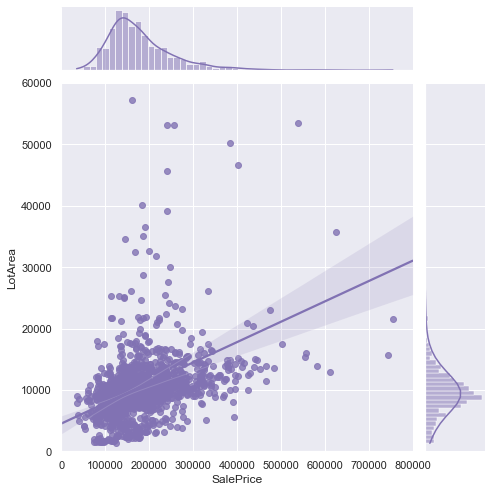

In [ ]:
# create a joint scatterplot and distribution chart to view relationship between lot area and sale price
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="SalePrice", y="LotArea", data=df_train,
                  kind="reg", truncate=False,
                  xlim=(0, 800000), ylim=(0, 60000),
                  color="m", height=7)

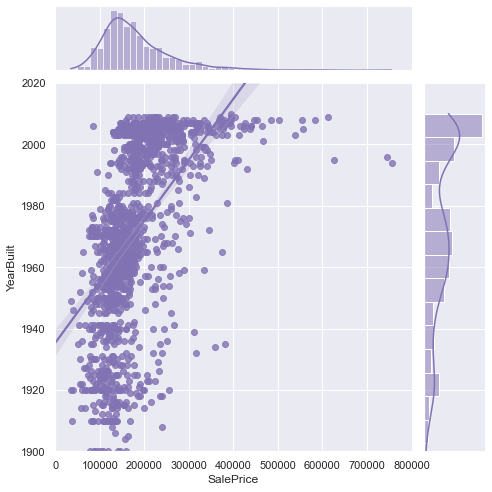

In [ ]:
# create a joint scatterplot and distribution chart to view relationship between year built and sale price
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="SalePrice", y="YearBuilt", data=df_train,
                  kind="reg", truncate=False,
                  xlim=(0, 800000), ylim=(1900, 2020),
                  color="m", height=7)

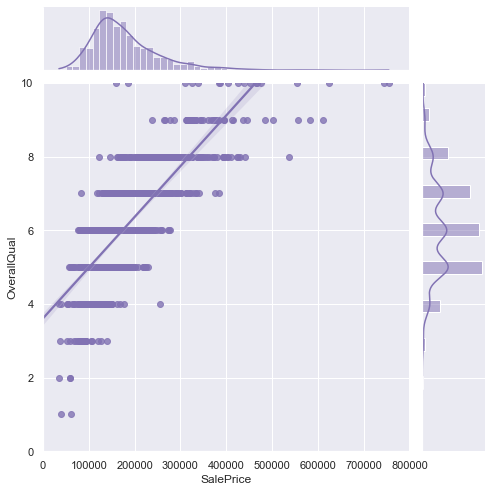

In [ ]:
# create a joint scatterplot and histogram to view relationship between overall quality and sale price
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="SalePrice", y="OverallQual", data=df_train,
                  kind="reg", truncate=False,
                  xlim=(0, 800000), ylim=(0, 10),
                  color="m", height=7)

In [ ]:
# check correlation for each input variable
corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
# create new variable - overall quality x above ground living area square feet
df_train['LivArea_Qual'] = df_train['OverallQual'] * df_train['GrLivArea']

corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
LivArea_Qual     0.832057
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

In [ ]:
# convert Years column to int, then create new variable - years since remodel x overall quality
df_train['YearRemodAdd'] = df_train['YearRemodAdd'].astype(int)
df_train['YearBuilt'] = df_train['YearBuilt'].astype(int)


num_years = df_train['YrSold'] - df_train['YearRemodAdd']
num_years = 100 - num_years
df_train['Home_Age_Qual'] = num_years * df_train['OverallQual']

# check basic descriptive stats about new feature
df_train.Home_Age_Qual.describe()


count    1460.000000
mean      485.715068
std       204.292734
min        41.000000
25%       300.000000
50%       476.000000
75%       658.000000
max      1010.000000
Name: Home_Age_Qual, dtype: float64

In [ ]:
# check correlation with new feature
corr = df_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
LivArea_Qual     0.832057
OverallQual      0.790982
Home_Age_Qual    0.752034
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

In [ ]:
# create new df of columns with correlation above .6
new_df = pd.DataFrame(data=df_train, columns = ["SalePrice","LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"])
new_df

,SalePrice,LivArea_Qual,OverallQual,Home_Age_Qual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,208500,11970,7,665,1710,2,548,856,856
1,181500,7572,6,414,1262,2,460,1262,1262
2,223500,12502,7,658,1786,2,608,920,920
3,140000,12019,7,448,1717,3,642,756,961
4,250000,17584,8,736,2198,3,836,1145,1145
...,...,...,...,...,...,...,...,...,...
1455,175000,9882,6,558,1647,2,460,953,953
1456,210000,12438,6,468,2073,2,500,1542,2073
1457,266500,16380,7,672,2340,1,252,1152,1188
1458,142125,5390,5,430,1078,1,240,1078,1078


Modeling

In [ ]:
# MODELING
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import svm

In [ ]:
# define predictor and response variables - use all variables in new df
x_train = new_df[["LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]
y_train = new_df["SalePrice"]


In [ ]:
# create the multiple linear regression model
model = Ridge(alpha=1.0)

# prepare the cross validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
full_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error',cv=cv)

# view root mean squared error
print("The RSME for my first model is: ", sqrt(mean(absolute(full_scores))))

The RSME for my first model is:  149.349095203327


In [ ]:
# evaluate model using R2 score
full_scores_r2 = cross_val_score(model, x_train, y_train, scoring='r2',cv=cv)

# view scores
full_scores_r2

array([0.85796625, 0.86660503, 0.86669271, 0.06606358, 0.8003592 ,
       0.83247359, 0.60541269, 0.80560212, 0.85192727, 0.84398747,
       0.83722398, 0.82677711, 0.81806644, 0.86987566, 0.85773508,
       0.82036072, 0.81830687, 0.66624363, 0.83639175, 0.19654933,
       0.84269067, 0.76992153, 0.84785033, 0.78752149, 0.25844203,
       0.86392895, 0.67029921, 0.85133252, 0.81889206, 0.84769896])

In [ ]:
# read in unseen data from the test set
df_test = pd.read_csv("test.csv")

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# create new variable - overall quality x above ground living area square feet
df_test['LivArea_Qual'] = df_test['OverallQual'] * df_test['GrLivArea']

# convert Years column to int, then create new variable - years since remodel x overall quality
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].astype(int)
df_test['YearBuilt'] = df_test['YearBuilt'].astype(int)

num_years = df_test['YrSold'] - df_test['YearRemodAdd']
num_years = 100 - num_years
df_test['Home_Age_Qual'] = num_years * df_test['OverallQual']

# check basic descriptive stats about new feature
df_test.Home_Age_Qual.describe()

count    1459.000000
mean      479.302262
std       212.476242
min        44.000000
25%       286.000000
50%       468.000000
75%       658.000000
max      1020.000000
Name: Home_Age_Qual, dtype: float64

In [ ]:
# create new df for features that I use in the model
new_df_test = pd.DataFrame(data=df_test, columns = ["Id","LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"])

new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LivArea_Qual   1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   Home_Age_Qual  1459 non-null   int64  
 4   GrLivArea      1459 non-null   int64  
 5   GarageCars     1458 non-null   float64
 6   GarageArea     1458 non-null   float64
 7   TotalBsmtSF    1458 non-null   float64
 8   1stFlrSF       1459 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.7 KB


In [ ]:
# replace nan values with mean
new_df_test['GarageCars'].fillna(value=new_df_test['GarageCars'].mean(), inplace=True)
new_df_test['GarageArea'].fillna(value=new_df_test['GarageArea'].mean(), inplace=True)
new_df_test['TotalBsmtSF'].fillna(value=new_df_test['TotalBsmtSF'].mean(), inplace=True)
new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LivArea_Qual   1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   Home_Age_Qual  1459 non-null   int64  
 4   GrLivArea      1459 non-null   int64  
 5   GarageCars     1459 non-null   float64
 6   GarageArea     1459 non-null   float64
 7   TotalBsmtSF    1459 non-null   float64
 8   1stFlrSF       1459 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.7 KB


In [ ]:
# create x_test for input variables
x_test = new_df_test[["LivArea_Qual","OverallQual","Home_Age_Qual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]

# fit on training data and make predictions on test dataset
model.fit(x_train, y_train)
price_pred = model.predict(x_test)
price_pred = pd.DataFrame(data=price_pred, columns=['SalePrice'])

# check descriptive stats for the price predictions
price_pred.describe()

,SalePrice
count,1459.000000
mean,178264.473288
std,69984.098828
min,32172.561430
25%,126626.522557
50%,164593.545231
75%,216926.554013
max,703926.786982


In [ ]:
# create new dataframe with record ID and price prediction
data = [new_df_test["Id"], price_pred["SalePrice"]]

final_df = pd.concat(data, axis=1)
final_df

,Id,SalePrice
0,1461,106330.620532
1,1462,146021.860437
2,1463,158244.502334
3,1464,179906.503563
4,1465,213908.868334
...,...,...
1454,2915,72774.026675
1455,2916,89579.428988
1456,2917,158310.424783
1457,2918,106959.408918


In [ ]:
# export final df to csv
final_df.to_csv('predictions_ridge.csv', index=False)

In [ ]:
# create Lasso regression model

In [ ]:
# create the Lasso regression model
model = Lasso()

# prepare the cross validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
full_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error',cv=cv)

# view root mean squared error
print("The RSME for my first model is: ", sqrt(mean(absolute(full_scores))))

The RSME for my first model is:  149.36247133088378


In [ ]:
# fit on training data and make predictions on test dataset
model.fit(x_train, y_train)
lasso_pred = model.predict(x_test)
lasso_pred = pd.DataFrame(data=price_pred, columns=['SalePrice'])

# check descriptive stats for the price predictions
lasso_pred.describe()

,SalePrice
count,1459.000000
mean,178264.473288
std,69984.098828
min,32172.561430
25%,126626.522557
50%,164593.545231
75%,216926.554013
max,703926.786982


In [ ]:
# create new dataframe with record ID and price prediction
data = [new_df_test["Id"], lasso_pred["SalePrice"]]

lasso_df = pd.concat(data, axis=1)
lasso_df

,Id,SalePrice
0,1461,106330.620532
1,1462,146021.860437
2,1463,158244.502334
3,1464,179906.503563
4,1465,213908.868334
...,...,...
1454,2915,72774.026675
1455,2916,89579.428988
1456,2917,158310.424783
1457,2918,106959.408918


In [ ]:
# export final df to csv
final_df.to_csv('predictions_lasso.csv', index=False)

In [ ]:
# %%capture --no-display
# create ElasticNet regression model
from sklearn.linear_model import ElasticNetCV

# hyperparameter tuning for the ElasticNet model
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ratios = arange(0.01, 1, 0.01)
elastic_model = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=10)
elastic_model = elastic_model.fit(x_train, y_train)

optimal_alpha = elastic_model.alpha_
optimal_ratio = elastic_model.l1_ratio_
print(optimal_alpha, optimal_ratio)

/Users/kyleberry/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29188448157.108887, tolerance: 785203388.8728523
  model = cd_fast.enet_coordinate_descent_gram(


100.0 0.01


In [ ]:
# score the model
elastic_model = ElasticNetCV(n_alphas=100, l1_ratio=.01)
elastic_model.fit(x_train, y_train)

elastic_pred = elastic_model.predict(x_test)
elastic_pred = pd.DataFrame(data=elastic_pred, columns=['SalePrice'])

# check descriptive stats for the price predictions
elastic_pred.describe()

,SalePrice
count,1459.000000
mean,179496.234939
std,27368.579043
min,129917.259161
25%,159717.817273
50%,173777.042897
75%,192854.643732
max,416488.286469


In [ ]:
# create new dataframe with record ID and price prediction
data = [new_df_test["Id"], elastic_pred["SalePrice"]]

elastic_df = pd.concat(data, axis=1)
elastic_df

,Id,SalePrice
0,1461,151447.517662
1,1462,171424.493869
2,1463,172282.240578
3,1464,180556.655286
4,1465,184157.741341
...,...,...
1454,2915,150508.589219
1455,2916,150565.254355
1456,2917,161023.335992
1457,2918,153480.560895


In [ ]:
# export final df to csv
elastic_df.to_csv('predictions_elastic.csv', index=False)

Conclusion

In [1]:
# Of the different variations of regression models that I built, the Ridge regression model performed the best.
